# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for i in lat_lngs:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

df = pd.DataFrame(cities)
df['Country'] = ''
df['Date'] = ''
df['Lat'] = ''
df['Lng'] = ''
df['Max Temp'] = ''
df['Humidity'] = ''
df['Cloudiness'] = ''
df['Wind Speed'] = ''
df.rename(columns = {0 : 'City'}, inplace = True)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
for index, row in df.iterrows():
    url = "http://api.openweathermap.org/data/2.5/weather?"
    city = row['City']
    response = requests.get(url + 'appid=' + weather_api_key + '&q=' + city + "&units=Imperial")
    response = response.json()
    try:
        print(f'{city} has been added to the DataFrame.')
        df.loc[index, 'Lat'] = response['coord']['lat']
        df.loc[index, 'Lng'] = response['coord']['lon']
        df.loc[index, 'Max Temp'] = response['main']['temp_max']
        df.loc[index, 'Humidity'] = response['main']['humidity']
        df.loc[index, 'Cloudiness'] = response['clouds']['all']
        df.loc[index, 'Wind Speed'] = response['wind']['speed']
        df.loc[index, 'Country'] = response['sys']['country']
        df.loc[index, 'Date'] = response['dt']
    except(KeyError, IndexError):
        print('Missing City ... Skipping')

tautira has been added to the DataFrame.
inhambane has been added to the DataFrame.
bengkulu has been added to the DataFrame.
vardo has been added to the DataFrame.
kirakira has been added to the DataFrame.
nikolskoye has been added to the DataFrame.
souillac has been added to the DataFrame.
paamiut has been added to the DataFrame.
kodiak has been added to the DataFrame.
mar del plata has been added to the DataFrame.
chibuto has been added to the DataFrame.
hobyo has been added to the DataFrame.
shestakovo has been added to the DataFrame.
yellowknife has been added to the DataFrame.
hithadhoo has been added to the DataFrame.
clyde river has been added to the DataFrame.
naantali has been added to the DataFrame.
albany has been added to the DataFrame.
castro has been added to the DataFrame.
den helder has been added to the DataFrame.
noumea has been added to the DataFrame.
khonuu has been added to the DataFrame.
Missing City ... Skipping
kavieng has been added to the DataFrame.
kiamba ha

tual has been added to the DataFrame.
port keats has been added to the DataFrame.
arlit has been added to the DataFrame.
parry sound has been added to the DataFrame.
batalha has been added to the DataFrame.
comodoro rivadavia has been added to the DataFrame.
manzanillo has been added to the DataFrame.
half moon bay has been added to the DataFrame.
nanortalik has been added to the DataFrame.
mujiayingzi has been added to the DataFrame.
axim has been added to the DataFrame.
xining has been added to the DataFrame.
tromso has been added to the DataFrame.
petropavlivka has been added to the DataFrame.
codo has been added to the DataFrame.
bulgan has been added to the DataFrame.
neepawa has been added to the DataFrame.
mys shmidta has been added to the DataFrame.
Missing City ... Skipping
nova floresta has been added to the DataFrame.
talesh has been added to the DataFrame.
Missing City ... Skipping
tiksi has been added to the DataFrame.
mumford has been added to the DataFrame.
aklavik has b

garden city has been added to the DataFrame.
kushalgarh has been added to the DataFrame.
rio grande has been added to the DataFrame.
cockburn harbour has been added to the DataFrame.
Missing City ... Skipping
saurimo has been added to the DataFrame.
namatanai has been added to the DataFrame.
leshukonskoye has been added to the DataFrame.
amderma has been added to the DataFrame.
Missing City ... Skipping
skjervoy has been added to the DataFrame.
san quintin has been added to the DataFrame.
taywarah has been added to the DataFrame.
lamar has been added to the DataFrame.
nytva has been added to the DataFrame.
rawson has been added to the DataFrame.
pangkalanbuun has been added to the DataFrame.
abha has been added to the DataFrame.
port-cartier has been added to the DataFrame.
umm kaddadah has been added to the DataFrame.
biltine has been added to the DataFrame.
nguiu has been added to the DataFrame.
Missing City ... Skipping
yarada has been added to the DataFrame.
la ronge has been added

orlik has been added to the DataFrame.
klaksvik has been added to the DataFrame.
inndyr has been added to the DataFrame.
austin has been added to the DataFrame.
takoradi has been added to the DataFrame.
lodja has been added to the DataFrame.
karkaralinsk has been added to the DataFrame.
Missing City ... Skipping
stezzano has been added to the DataFrame.
mao has been added to the DataFrame.
anadyr has been added to the DataFrame.
salinopolis has been added to the DataFrame.
baghdad has been added to the DataFrame.
zhuhai has been added to the DataFrame.
bajo baudo has been added to the DataFrame.
Missing City ... Skipping
songea has been added to the DataFrame.
muroto has been added to the DataFrame.
hamilton has been added to the DataFrame.
suez has been added to the DataFrame.
necochea has been added to the DataFrame.
pontianak has been added to the DataFrame.
coral springs has been added to the DataFrame.
anta has been added to the DataFrame.
mehamn has been added to the DataFrame.
m

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
cities_df = df.replace('', np.nan)

In [24]:
cities_full = cities_df.dropna(axis = 0)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
#  Get the indices of cities that have humidity over 100%.
cities_full.describe()

,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,5.710000e+02,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,1.590174e+09,20.022802,19.623363,65.698581,67.660245,51.322242,8.587671
std,7.391365e+01,33.671211,89.199380,16.164668,22.615555,40.708349,5.889015
min,1.590174e+09,-54.800000,-179.170000,20.980000,3.000000,0.000000,0.200000
25%,1.590174e+09,-8.190000,-55.375000,54.815000,54.000000,3.000000,4.205000
50%,1.590174e+09,26.270000,23.100000,66.200000,74.000000,55.000000,7.140000
75%,1.590174e+09,48.530000,97.230000,78.970000,84.000000,91.000000,11.690000
max,1.590174e+09,78.220000,179.320000,109.400000,100.000000,100.000000,32.210000


In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cities_clean = cities_full.loc[cities_full['Humidity']< 100]

In [27]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
cities_clean.to_csv('City_data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

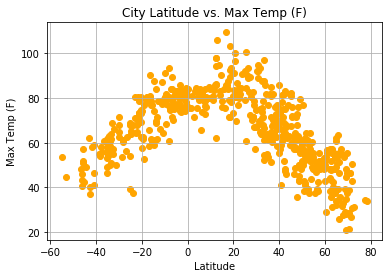

In [28]:
from scipy import stats
import scipy.stats as st

x = cities_clean['Lat']
y = cities_clean['Max Temp']

plt.scatter(x,y, facecolors = 'orange')
plt.title('City Latitude vs. Max Temp (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid(b= True)
plt.savefig("Fig1.png")

#The temperature increases as you get closer to the equator

## Latitude vs. Humidity Plot

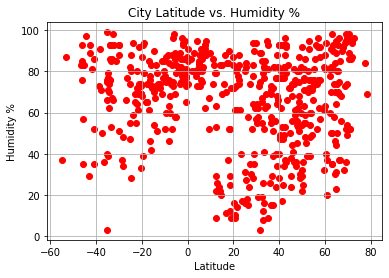

In [29]:
x = cities_clean['Lat']
y = cities_clean['Humidity']

plt.scatter(x,y, facecolors = 'red')
plt.title('City Latitude vs. Humidity %')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid(b= True)
plt.savefig("Fig2.png")
#The humidity increases as latitude increases

## Latitude vs. Cloudiness Plot

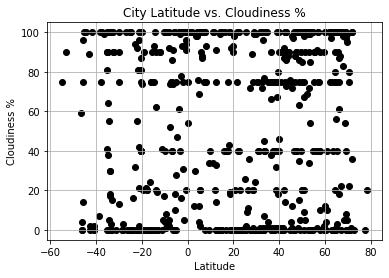

In [30]:
x = cities_clean['Lat']
y = cities_clean['Cloudiness']

plt.scatter(x,y, facecolors = 'black')
plt.title('City Latitude vs. Cloudiness %')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid(b= True)
plt.savefig("Fig3.png")
#Majority of citys have either 100% cloudiness or very low-to-0 cloudiness

## Latitude vs. Wind Speed Plot

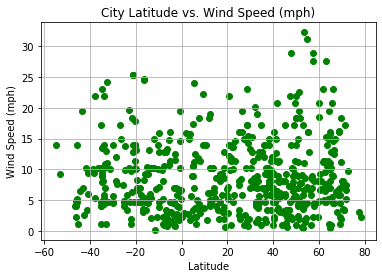

In [31]:
x = cities_clean['Lat']
y = cities_clean['Wind Speed']

plt.scatter(x,y, facecolors = 'green')
plt.title('City Latitude vs. Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(b= True)
plt.savefig("Fig4.png")
#Most observed cities do not have wind speed above 10 mph

## Linear Regression

In [32]:
# Create Northern and Southern Hemisphere DataFrames
northern = cities_clean.loc[cities_clean['Lat']>= 0]
southern = cities_clean.loc[cities_clean['Lat']< 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r-squared is -0.8066692439794334


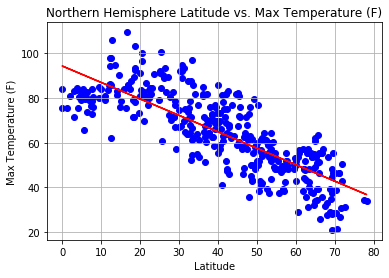

In [33]:
x = northern['Lat']
y = northern['Max Temp']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'blue')
plt.plot(x, line, color = 'red')
plt.title('Northern Hemisphere Latitude vs. Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("Fig5.png")
# The high -r value indicates a strong negative correlation between latitude and max temperature. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r-squared is 0.8110161044756001


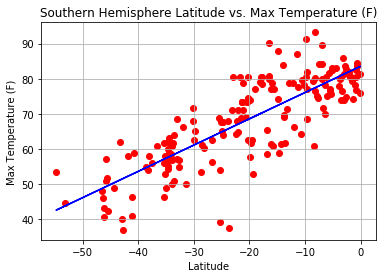

In [34]:
x = southern['Lat']
y = southern['Max Temp']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'red')
plt.plot(x, line, color = 'blue')
plt.title('Southern Hemisphere Latitude vs. Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("Fig6.png")
# The high r value indicates a strong positive correlation between latitude and max temperature. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r-squared is 0.06006183836564589


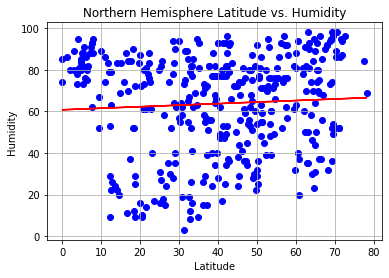

In [35]:
x = northern['Lat']
y = northern['Humidity']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'blue')
plt.plot(x, line, color = 'red')
plt.title('Northern Hemisphere Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("Fig7.png")
#The low r values indicate a weak to no relationship between humidity and latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r-squared is 0.1795901282033627


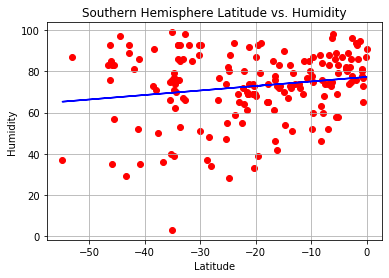

In [36]:
x = southern['Lat']
y = southern['Humidity']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'red')
plt.plot(x, line, color = 'blue')
plt.title('Southern Hemisphere Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("Fig8.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r-squared is 0.06320773904179484


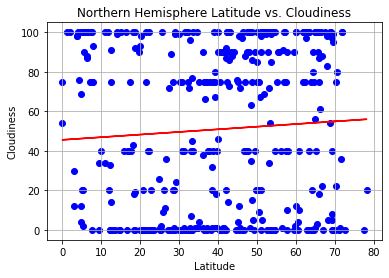

In [38]:
x = northern['Lat']
y = northern['Cloudiness']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'blue')
plt.plot(x, line, color = 'red')
plt.title('Northern Hemisphere Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("Fig9.png")
#The low r values indicate a weak positive relationship between latitude and cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r-squared is 0.1075269758032481


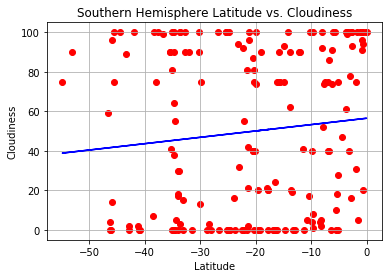

In [39]:
x = southern['Lat']
y = southern['Cloudiness']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'red')
plt.plot(x, line, color = 'blue')
plt.title('Southern Hemisphere Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("Fig10.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r-squared is 0.057208670357885204


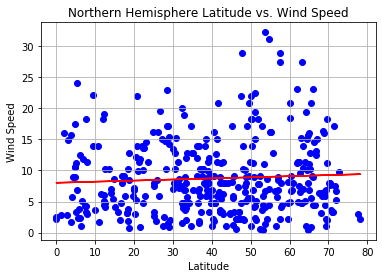

In [40]:
x = northern['Lat']
y = northern['Wind Speed']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'blue')
plt.plot(x, line, color = 'red')
plt.title('Northern Hemisphere Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("Fig11.png")
#The low r values indicate that there is no real relationship between wind speed and latitude. The difference 
#between the hemispheres doesn't seem to be significant enough to comment upon.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r-squared is -0.1431720951797087


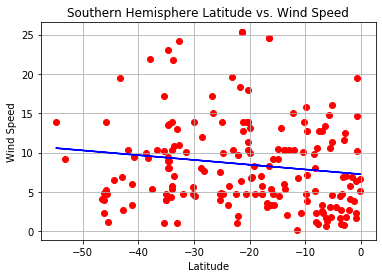

In [41]:
x = southern['Lat']
y = southern['Wind Speed']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'red')
plt.plot(x, line, color = 'blue')
plt.title('Southern Hemisphere Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(b= True)
plt.savefig("Fig12.png")
print(f' The r-squared is {cor[0]}')